# PANDAS DST

## A notebook to describe high level objects produced by Pandas for interactive analysis 

In [1]:
from __future__ import print_function

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np

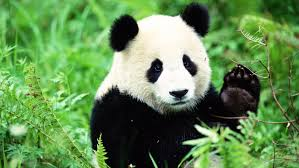

In [4]:
Image(filename='../Images/PANDA.jpg') 

http://pandas.pydata.org

### Geometry and Sensor tables to Pandas objects

In [93]:
h5out = tb.open_file('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/wf_bi.h5', "r+") 

In [96]:
h5out

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/wf_bi.h5, title='', mode='r+', root_uep='/', filters=Filters(complevel=0, shuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/pmtrd (EArray(10, 12, 23999), zlib(1)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 1, 23999)
/sipmrd (EArray(10, 1792, 600), zlib(1)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1, 50, 600)
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float64Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float64Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float64Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (1170,)
/MC (Group) ''
/MC/MCTracks (Table(1134,)) ''
  description := {
  "event_indx": Int32

In [94]:
geom_t = h5out.root.Detector.DetectorGeometry

In [95]:
geom_t

/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float64Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float64Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float64Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (1170,)

#### This function reads the geom_t table and produces a panda series

In [8]:
def read_data_geom(geom_t):
    """
    Reads the geom table en returns a PD Series
    """
        
    ga = geom_t.read()
    G = pd.Series([ga[0][0][0],ga[0][0][1],ga[0][1][0],ga[0][1][1],
                    ga[0][2][0],ga[0][2][1],ga[0][3]],
                    index=['xdet_min','xdet_max','ydet_min','ydet_max',
                            'zdet_min','zdet_max','R'])
    return G

In [9]:
geo = read_data_geom(geom_t)

In [97]:
geo

xdet_min   -198.0
xdet_max    198.0
ydet_min   -198.0
ydet_max    198.0
zdet_min      0.0
zdet_max    532.0
R           198.0
dtype: float64

In [11]:
geo['xdet_min']

-198.0

In [12]:
geo['xdet_max']

198.0

#### FEE table

In [98]:
fee_t = h5out.root.MC.FEE

NoSuchNodeError: group ``/MC`` does not have a child named ``FEE``

In [14]:
fee_t

/MC/FEE (Table(1,)) 'EP-FEE parameters'
  description := {
  "offset": Int16Col(shape=(), dflt=0, pos=0),
  "pmt_gain": Float32Col(shape=(), dflt=0.0, pos=1),
  "V_gain": Float32Col(shape=(), dflt=0.0, pos=2),
  "R": Float32Col(shape=(), dflt=0.0, pos=3),
  "C12": Float32Col(shape=(12,), dflt=0.0, pos=4),
  "time_step": Float32Col(shape=(), dflt=0.0, pos=5),
  "time_daq": Float32Col(shape=(), dflt=0.0, pos=6),
  "freq_LPF": Float32Col(shape=(), dflt=0.0, pos=7),
  "freq_HPF": Float32Col(shape=(), dflt=0.0, pos=8),
  "LSB": Float32Col(shape=(), dflt=0.0, pos=9),
  "volts_to_adc": Float32Col(shape=(), dflt=0.0, pos=10),
  "noise_fee_rms": Float32Col(shape=(), dflt=0.0, pos=11),
  "noise_adc": Float32Col(shape=(), dflt=0.0, pos=12)}
  byteorder := 'little'
  chunkshape := (697,)

In [15]:
feea = fee_t.read()

In [16]:
feea

array([ (0, 4500000.0, 4.005443302338915e-14, 3.765116744856162e-13, [3.763474971544781e+16, 3.885632431377613e+16, 3.786805233896653e+16, 3.883212217306317e+16, 3.932147786186752e+16, 3.806647123810714e+16, 3.859057321233613e+16, 3.880816484548608e+16, 3.86540657138729e+16, 3.935387050521395e+16, 3.871980018833818e+16, 3.939833630162944e+16], 1.0, 25.0, 0.003000000026077032, 1.0923468835244421e-05, 4.882812487672084e-10, 0.0003906250058207661, 7.000000024071085e-10, 1.7920000553131104)], 
      dtype=[('offset', '<i2'), ('pmt_gain', '<f4'), ('V_gain', '<f4'), ('R', '<f4'), ('C12', '<f4', (12,)), ('time_step', '<f4'), ('time_daq', '<f4'), ('freq_LPF', '<f4'), ('freq_HPF', '<f4'), ('LSB', '<f4'), ('volts_to_adc', '<f4'), ('noise_fee_rms', '<f4'), ('noise_adc', '<f4')])

In [17]:
feea[0][1]

4500000.0

In [18]:
def read_data_FEE(fee_t):
    """
    Reads the FEE table en returns a PD Series for the simulation parameters 
    and a PD series for the values of the capacitors used in the simulation
    """
        
    fa = fee_t.read()
    F = pd.Series([fa[0][0],fa[0][1],fa[0][2],fa[0][3],fa[0][5],fa[0][6],fa[0][7],fa[0][8],fa[0][9],fa[0][10],
                   fa[0][11],fa[0][12]],
                    index=['offset','pmt_gain','V_gain','R',"time_step",
                           "time_daq",
                            "freq_LPF",
                            "freq_HPF",
                            "LSB",
                            "volts_to_adc",
                            "noise_fee_rms",
                            "noise_adc"])
    C =pd.Series([fa[0][4]],index=['C12'])
    return F,C

In [19]:
fee,c12 = read_data_FEE(fee_t)

In [20]:
fee

offset           0.000000e+00
pmt_gain         4.500000e+06
V_gain           4.005443e-14
R                3.765117e-13
time_step        1.000000e+00
time_daq         2.500000e+01
freq_LPF         3.000000e-03
freq_HPF         1.092347e-05
LSB              4.882812e-10
volts_to_adc     3.906250e-04
noise_fee_rms    7.000000e-10
noise_adc        1.792000e+00
dtype: float64

In [21]:
from system_of_units import *

In [22]:
c12/nF

C12    [6.02975, 6.22547, 6.06713, 6.22159, 6.3, 6.09...
dtype: object

In [23]:
R = fee['R']/ohm

In [24]:
R

2350.000012081161

In [25]:
C = c12[0][0]/nF

In [26]:
C

6.0297542814314413

In [27]:
np.exp(-1./(R*C))

0.99992943047463023

In [28]:
1. -np.exp(-1./(R*C))

7.0569525369768016e-05

In [29]:
R

2350.000012081161

In [30]:
c12[0]

array([  3.76347497e+16,   3.88563243e+16,   3.78680523e+16,
         3.88321222e+16,   3.93214779e+16,   3.80664712e+16,
         3.85905732e+16,   3.88081648e+16,   3.86540657e+16,
         3.93538705e+16,   3.87198002e+16,   3.93983363e+16], dtype=float32)

#### Transform PMT (SiPM) data tables in DF

In [31]:
def get_column(pmta,ic):
    """
    access column ic of table pmta and returns column as an array
    """
    col =[]
    for i in range(pmta.shape[0]):
        col.append(pmta[i][ic])
    return np.array(col)
 
def read_data_sensors(sensor_table):
    """
    reads the sensors table and returns a data frame
    """
    pmta = sensor_table.read()
    PMT={}
    PMT['channel'] = get_column(pmta,0)
    PMT['active'] = get_column(pmta,1)
    PMT['x'] = get_column(pmta,2).T[0]
    PMT['y'] = get_column(pmta,2).T[1]
    PMT['gain'] = get_column(pmta,3)
    PMT['adc_to_pes'] = get_column(pmta,4)
        
    return pd.DataFrame(PMT)

In [99]:
pmt_t = h5out.root.Sensors.DataPMT
sipm_t = h5out.root.Sensors.DataSiPM

In [100]:
pmt_t

/Sensors/DataPMT (Table(12,)) ''
  description := {
  "channel": Int32Col(shape=(), dflt=0, pos=0),
  "active": Int32Col(shape=(), dflt=0, pos=1),
  "position": Float64Col(shape=(3,), dflt=0.0, pos=2),
  "gain": Float64Col(shape=(), dflt=0.0, pos=3),
  "adc_to_pes": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1365,)

In [101]:
sipm_t

/Sensors/DataSiPM (Table(1792,)) ''
  description := {
  "channel": Int32Col(shape=(), dflt=0, pos=0),
  "active": Int32Col(shape=(), dflt=0, pos=1),
  "position": Float64Col(shape=(3,), dflt=0.0, pos=2),
  "gain": Float64Col(shape=(), dflt=0.0, pos=3),
  "adc_to_pes": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (1365,)

In [102]:
pmtdf = read_data_sensors(pmt_t)

In [103]:
pmtdf

,active,adc_to_pes,channel,gain,x,y
0,1,20.0,0,4500000.0,23.9414,65.7785
1,1,20.0,1,4500000.0,-68.9365,-12.1554
2,1,20.0,2,4500000.0,44.9951,-53.6231
3,1,20.0,3,4500000.0,0.0000,185.0000
4,1,20.0,5,4500000.0,-118.9160,141.7180
5,1,20.0,6,4500000.0,-182.1890,32.1249
6,1,20.0,8,4500000.0,-160.2150,-92.5000
7,1,20.0,9,4500000.0,-63.2737,-173.8430
8,1,20.0,10,4500000.0,63.2737,-173.8430
9,1,20.0,12,4500000.0,160.2150,-92.5000


In [104]:
sipmdf = read_data_sensors(sipm_t)

In [105]:
sipmdf

,active,adc_to_pes,channel,gain,x,y
0,1,1.0,1000,1.0,235.0,45.0
1,1,1.0,1001,1.0,235.0,55.0
2,1,1.0,1002,1.0,235.0,65.0
3,1,1.0,1003,1.0,235.0,75.0
4,1,1.0,1004,1.0,235.0,85.0
5,1,1.0,1005,1.0,235.0,95.0
6,1,1.0,1006,1.0,235.0,105.0
7,1,1.0,1007,1.0,235.0,115.0
8,1,1.0,1008,1.0,225.0,45.0
9,1,1.0,1009,1.0,225.0,55.0


#### Transform the table with the energy (in pes) of the PMTs (SiPMs) in a DF

In [106]:
epmt_v = h5out.root.RD.epmt

NoSuchNodeError: group ``/`` does not have a child named ``RD``

In [40]:
epmt_v

/RD/epmt (EArray(99, 12), shuffle, blosc(9)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1365, 12)

read the extensible array in a vector

In [41]:
epmt = epmt_v.read()

In [42]:
epmt

array([[ 5925,  5976,  5905, ...,  5017,  5089,  5108],
       [ 4475,  4669,  4645, ...,  4064,  3890,  3958],
       [20056, 20176, 20134, ..., 17017, 16944, 16864],
       ..., 
       [ 6014,  6079,  6173, ...,  5266,  5242,  5154],
       [41144, 41187, 40822, ..., 35448, 35031, 35233],
       [  423,   461,   451, ...,   361,   406,   405]], dtype=int32)

and transform directly into a DF

In [43]:
epmtdf = pd.DataFrame(epmt)

In [44]:
epmtdf

,0,1,2,3,4,5,6,7,8,9,10,11
0,5925,5976,5905,5053,5061,5025,5107,5100,5053,5017,5089,5108
1,4475,4669,4645,3970,3943,3930,3896,4056,3954,4064,3890,3958
2,20056,20176,20134,17003,17100,17131,17125,17037,17149,17017,16944,16864
3,3762,3727,3645,3232,3163,3296,3210,3161,3269,3073,3150,3155
4,4186,4094,4113,3475,3484,3579,3578,3401,3505,3617,3522,3394
5,361,356,375,341,318,281,301,320,277,311,268,318
6,4927,4828,5028,4253,4292,4265,4320,4173,4286,4331,4378,4213
7,21104,21153,21024,18065,18007,18172,18217,17868,18024,18188,17792,17839
8,5471,5268,5460,4543,4474,4671,4499,4673,4466,4551,4506,4556
9,8027,7990,7847,6776,6736,6773,6865,6728,6638,6849,6852,6724


#### Same operation for SiPM

In [45]:
sipm_v = h5out.root.RD.esipm

In [46]:
sipm_v

/RD/esipm (EArray(99, 1792), shuffle, blosc(9)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (9, 1792)

In [47]:
def read_energy_sensors(energy_v):
    """
    reads the sensors energy and returns a data frame
    """        
    return pd.DataFrame(energy_v.read())

In [48]:
epmtdf = read_energy_sensors(epmt_v)

In [49]:
epmtdf

,0,1,2,3,4,5,6,7,8,9,10,11
0,5925,5976,5905,5053,5061,5025,5107,5100,5053,5017,5089,5108
1,4475,4669,4645,3970,3943,3930,3896,4056,3954,4064,3890,3958
2,20056,20176,20134,17003,17100,17131,17125,17037,17149,17017,16944,16864
3,3762,3727,3645,3232,3163,3296,3210,3161,3269,3073,3150,3155
4,4186,4094,4113,3475,3484,3579,3578,3401,3505,3617,3522,3394
5,361,356,375,341,318,281,301,320,277,311,268,318
6,4927,4828,5028,4253,4292,4265,4320,4173,4286,4331,4378,4213
7,21104,21153,21024,18065,18007,18172,18217,17868,18024,18188,17792,17839
8,5471,5268,5460,4543,4474,4671,4499,4673,4466,4551,4506,4556
9,8027,7990,7847,6776,6736,6773,6865,6728,6638,6849,6852,6724


In [50]:
esipmdf = read_energy_sensors(sipm_v)

In [51]:
esipmdf

,0,1,2,3,4,5,6,7,8,9,...,1782,1783,1784,1785,1786,1787,1788,1789,1790,1791
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Storing Pandas objects in HDF5

#### Open a file in disk 

In [52]:
store = pd.HDFStore('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/PandasDst/WF_Na_0_PDST.h5')

#### And now save objects to it

In [53]:
store['Sensors/PMTDF'] = pmtdf

In [54]:
store['Sensors/SIPMDF'] = sipmdf

In [55]:
store['Sensors/EPMTDF'] = epmtdf

In [56]:
store['Sensors/ESIPMDF'] = esipmdf

In [57]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/PandasDst/WF_Na_0_PDST.h5
/Sensors/EPMTDF             frame        (shape->[99,12])  
/Sensors/ESIPMDF            frame        (shape->[99,1792])
/Sensors/PMTDF              frame        (shape->[12,6])   
/Sensors/SIPMDF             frame        (shape->[1792,6]) 

#### close the file

In [58]:
store.close()

In [59]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/PandasDst/WF_Na_0_PDST.h5
File is CLOSED

#### Read back 

Open again the file

In [60]:
store = pd.HDFStore('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/PandasDst/WF_Na_0_PDST.h5')

In [61]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/PandasDst/WF_Na_0_PDST.h5
/Sensors/EPMTDF             frame        (shape->[99,12])  
/Sensors/ESIPMDF            frame        (shape->[99,1792])
/Sensors/PMTDF              frame        (shape->[12,6])   
/Sensors/SIPMDF             frame        (shape->[1792,6]) 

get back the DF for the PMTs

In [62]:
pmtdf2 = store['Sensors/PMTDF']

In [63]:
pmtdf2

,active,adc_to_pes,channel,gain,x,y
0,1,20.0,0,4500000.0,23.9414,65.7785
1,1,20.0,1,4500000.0,-68.9365,-12.1554
2,1,20.0,2,4500000.0,44.9951,-53.6231
3,1,20.0,3,4500000.0,0.0000,185.0000
4,1,20.0,5,4500000.0,-118.9160,141.7180
5,1,20.0,6,4500000.0,-182.1890,32.1249
6,1,20.0,8,4500000.0,-160.2150,-92.5000
7,1,20.0,9,4500000.0,-63.2737,-173.8430
8,1,20.0,10,4500000.0,63.2737,-173.8430
9,1,20.0,12,4500000.0,160.2150,-92.5000


### Plotting sensor maps

#### Import PlotUtil (defines circles): see http://localhost:8888/notebooks/Notebooks/PlotUtil.ipynb

In [64]:
epmtdf

,0,1,2,3,4,5,6,7,8,9,10,11
0,5925,5976,5905,5053,5061,5025,5107,5100,5053,5017,5089,5108
1,4475,4669,4645,3970,3943,3930,3896,4056,3954,4064,3890,3958
2,20056,20176,20134,17003,17100,17131,17125,17037,17149,17017,16944,16864
3,3762,3727,3645,3232,3163,3296,3210,3161,3269,3073,3150,3155
4,4186,4094,4113,3475,3484,3579,3578,3401,3505,3617,3522,3394
5,361,356,375,341,318,281,301,320,277,311,268,318
6,4927,4828,5028,4253,4292,4265,4320,4173,4286,4331,4378,4213
7,21104,21153,21024,18065,18007,18172,18217,17868,18024,18188,17792,17839
8,5471,5268,5460,4543,4474,4671,4499,4673,4466,4551,4506,4556
9,8027,7990,7847,6776,6736,6773,6865,6728,6638,6849,6852,6724


In [84]:
epmtdf[0]

0      5925
1      4475
2     20056
3      3762
4      4186
5       361
6      4927
7     21104
8      5471
9      8027
10     7280
11     5023
12     3178
13     7918
14     7373
15     4399
16     9369
17    30517
18    10035
19     3901
20    11616
21    13105
22     4065
23     1556
24     8440
25    10973
26     4906
27    42126
28     5121
29    14398
      ...  
69     9199
70     9430
71     3470
72    10910
73    24005
74     4004
75     4854
76     5558
77     5364
78     8465
79     9022
80    11736
81    17371
82     6269
83     5807
84     3283
85     9301
86     1020
87      261
88     7627
89     1546
90     3887
91     5021
92     3855
93    15800
94    16356
95     9268
96     6014
97    41144
98      423
Name: 0, dtype: int32

In [85]:
epmtdf.ix[0]

0     5925
1     5976
2     5905
3     5053
4     5061
5     5025
6     5107
7     5100
8     5053
9     5017
10    5089
11    5108
Name: 0, dtype: int32

In [65]:
from PlotUtil import *

In [86]:
def plot_sensor(geom_df,sensor_df, energy_df, event=0, radius=10):
    """
    plots the energy of the sensors (in pes)
    """
    x =sensor_df['x'].values
    y =sensor_df['y'].values
    r =np.ones(len(sensor_df['x'].values))*radius
    col = energy_df.ix[event].values
    
    plt.figure(figsize=(10,10))
    ax = plt.subplot(aspect='equal')
    circles(x, y, r, c=col, alpha=0.5, ec='none')
    plt.colorbar()
    #xlim(-198,198)  #one should use geom info
    #ylim(-198,198)
    xlim(geom_df['xdet_min'],geom_df['xdet_max'])
    ylim(geom_df['ydet_min'],geom_df['ydet_max'])
    return col

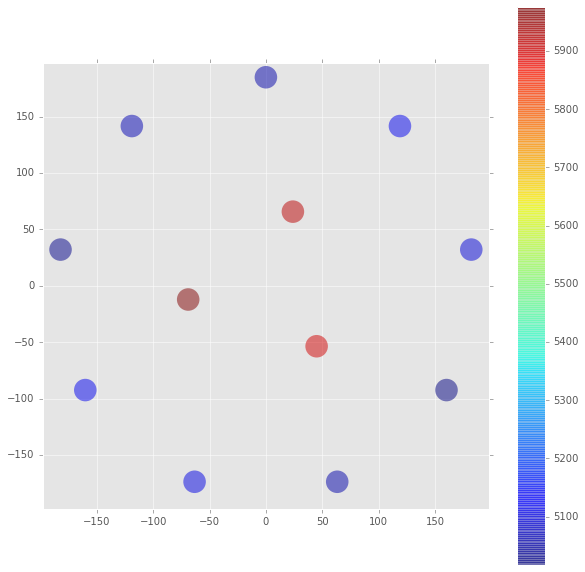

In [87]:
col =plot_sensor(geom_df=geo,sensor_df=pmtdf, energy_df=epmtdf, event=0, radius=10)

In [88]:
col

array([5925, 5976, 5905, 5053, 5061, 5025, 5107, 5100, 5053, 5017, 5089,
       5108], dtype=int32)

array([11616, 11571, 11839, 10087, 10189, 10270,  9987,  9855, 10038,
        9960, 10054, 10238], dtype=int32)

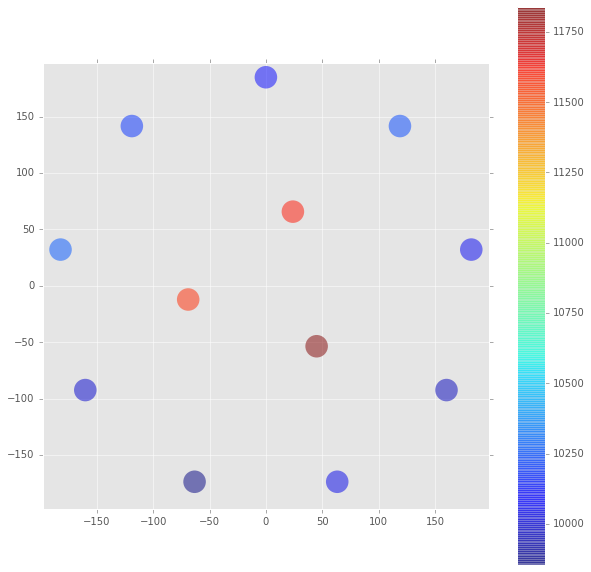

In [90]:
plot_sensor(geom_df=geo,sensor_df=pmtdf, energy_df=epmtdf, event=20, radius=10)

### Monte Carlo Particles (MCTrks)

#### Return all the MC tracks in the event

In [70]:
def get_mctrks(mctrk,event_number = 0):
    """
    return all the mc trks in an event
    """
    mcparticle ={}
    mc_name = []
    mc_pdg = []
    mc_vxi = []
    mc_vxf= []
    mc_nhits= []
    mc_energy= []
    for row in mctrk.iterrows():
        if row['hit_indx'] == 0 and row['event_indx'] == event_number:
            mc_name.append(row['particle_name'])
            mc_pdg.append(row['pdg_code'])
            mc_vxi.append(row['initial_vertex'])
            mc_vxf.append(row['final_vertex'])
            mc_nhits.append(row['nof_hits'])
            mc_energy.append(row['energy']) 
                
    mcparticle['name'] = mc_name
    mcparticle['pdg'] = mc_pdg
    mcparticle['vxi'] = mc_vxi
    mcparticle['vxf'] = mc_vxf
    mcparticle['nhits'] = mc_nhits
    mcparticle['energy'] = mc_energy
                
    return pd.DataFrame(mcparticle)

Get the table from pyDST

In [71]:
 mctrk = h5out.root.MC.MCTracks

In [72]:
get_mctrks(mctrk,event_number=12)

,energy,name,nhits,pdg,vxf,vxi
0,0.004775,gamma,1,22,"[172.626227323, 81.8070874152, 56.6085338417]","[197.840403909, 96.4859058331, 56.2528493061]"
1,0.058974,e-,8,11,"[172.77823567, 81.7543505435, 56.8805034902]","[172.626227323, 81.8070874152, 56.6085338417]"
2,0.005417,gamma,1,22,"[172.90498871, 90.0864844185, 58.7189473743]","[172.626227323, 81.8070874152, 56.6085338417]"
3,0.024364,e-,3,11,"[172.96862742, 90.0519802369, 58.6958523256]","[172.90498871, 90.0864844185, 58.7189473743]"


In [73]:
get_mctrks(mctrk,event_number=1)

,energy,name,nhits,pdg,vxf,vxi
0,0.004775,gamma,1,22,"[173.400207429, 85.3346403471, 57.6661474883]","[334.987661168, -0.0127898542986, 154.96846003]"
1,0.129983,e-,14,11,"[175.079159076, 84.7493281721, 57.921884566]","[173.400207429, 85.3346403471, 57.6661474883]"


In [74]:
mctrkdf  = get_mctrks(mctrk,event_number=2)

In [75]:
mctrkdf

,energy,name,nhits,pdg,vxf,vxi
0,0.034556,gamma,1,22,"[73.1577727301, 79.2806217784, 219.268348313]","[335.000211223, 0.000734614777655, 155.002203924]"
1,0.404848,e-,56,11,"[69.3148179602, 70.0560896721, 204.026486623]","[73.1577727301, 79.2806217784, 219.268348313]"


#### Get the hits of a MC particle

In [76]:
def get_mchits(mctrk,event_number = 0, particle_number =0):
    """
    return the mc hits of a mc particle in an event
    Takes the pointer to the table (not to the mctrk data frame)
    """
    mchits ={}
    hit_x = []
    hit_y = []
    hit_z = []
    hit_time = []
    hit_energy = []
    
    for row in mctrk.iterrows():
        if row['mctrk_indx'] == particle_number and row['event_indx'] == event_number:
            hit_x.append(row['hit_position'][0])
            hit_y.append(row['hit_position'][1])
            hit_z.append(row['hit_position'][2])
            hit_time.append(row['hit_time'])
            hit_energy.append(row['hit_energy'])
            
                
    mchits['x'] =hit_x
    mchits['y'] =hit_y
    mchits['z'] =hit_z
    mchits['time'] = hit_time
    mchits['energy'] = hit_energy
                
    return pd.DataFrame(mchits)

In [77]:
mchits = get_mchits(mctrk,event_number = 2, particle_number =1)

In [78]:
mchits

,energy,time,x,y,z
0,0.005706,6.227388e+15,72.689866,79.762143,218.660405
1,0.004898,6.227388e+15,72.760380,80.482880,218.119573
2,0.009060,6.227388e+15,73.167013,79.933093,217.531131
3,0.009078,6.227388e+15,73.530570,79.204851,217.149683
4,0.009108,6.227388e+15,73.862928,78.381954,217.030471
5,0.005295,6.227388e+15,74.232871,77.583401,216.886402
6,0.005088,6.227388e+15,74.593722,76.772558,216.825927
7,0.004283,6.227388e+15,75.332197,76.847044,216.339597
8,0.006964,6.227388e+15,75.112547,77.654554,216.050304
9,0.004161,6.227388e+15,74.905710,78.068196,215.299039


In [79]:
varr_x = mchits['energy'].values/keV

In [80]:
varr_x

array([  5.70603254,   4.89814495,   9.06007223,   9.07755235,
         9.10815161,   5.29491337,   5.08827731,   4.28275724,
         6.96426018,   4.16056528,   2.75243049,   6.03887941,
         7.13272551,   5.19155563,   8.09558429,   3.71023536,
         4.97252946,  12.16901161,   8.35528308,   4.82674449,
         1.4204472 ,   7.34082023,   4.24346784,   8.33506214,
         7.02214043,   5.84039958,   5.9016844 ,   5.01124169,
         3.04228636,   5.14895622,  10.24058317,   5.07969573,
         5.34312708,   2.38722542,   7.03125369,   7.33724274,
         6.8472181 ,   9.23699126,   8.46672921,   4.18569501,
        13.78027954,  10.70354894,  10.06562498,  13.77877344,
        10.37290294,   6.38481863,  13.61040379,   7.78702855,
        13.12635513,   6.57048961,   8.40792172,  16.80986973,
         8.06425852,   7.48148593,  11.16881792,   0.38720914])

#### Plot hits

In [81]:
def plot_track(geom_df,mchits_df,vox_size=10, zoom = False):
    """
    plot the hits of a mctrk. Adapted from JR plotting functions 
    notice that geom_df and mchits_df are pandas objects defined above
    if zoom = True, the track is zoomed in (min/max dimensions are taken from track)
    if zoom = False, detector dimensions are used
    """
    from mpl_toolkits.mplot3d import Axes3D
    
    
    grdcol = 0.99
    
    varr_x = mchits_df['x'].values*vox_size
    varr_y = mchits_df['y'].values*vox_size
    varr_z = mchits_df['z'].values*vox_size
    varr_c = mchits['energy'].values/keV
    
    min_x = geom_df['xdet_min']*vox_size
    max_x = geom_df['xdet_max']*vox_size
    min_y = geom_df['ydet_min']*vox_size
    max_y =geom_df['ydet_max']*vox_size
    min_z = geom_df['zdet_min']*vox_size
    max_z = geom_df['zdet_max']*vox_size
    emin=0 
    emax=np.max(varr_c)
    
    if zoom == True:
        min_x = np.min(varr_x)
        max_x = np.max(varr_x)
        min_y = np.min(varr_y)
        max_y = np.max(varr_y)
        min_z = np.min(varr_z)
        max_z = np.max(varr_z)
        emin=np.min(varr_c) 
        
    # Plot the 3D voxelized track.
    fig = plt.figure(1)
    fig.set_figheight(6.)
    fig.set_figwidth(8.)

    
    ax1 = fig.add_subplot(111,projection='3d');
    s1 = ax1.scatter(varr_x,varr_y,varr_z,marker='s',linewidth=0.5,
                         s=2*vox_size,c=varr_c,cmap=plt.get_cmap('rainbow'),
                         vmin=emin,vmax=emax)
    
    # this disables automatic setting of alpha relative of distance to camera
    s1.set_edgecolors = s1.set_facecolors = lambda *args:None;  
    
    
    print(" min_x ={} max_x ={}".format(min_x,max_x))
    print(" min_y ={} max_y ={}".format(min_y,max_y))
    print(" min_z ={} max_z ={}".format(min_z,max_z))
    print("min_e ={} max_e ={}".format(emin, emax))
    
    ax1.set_xlim([min_x, max_x])
    ax1.set_ylim([min_y, max_y])
    ax1.set_zlim([min_z, max_z])
    
    #    ax1.set_xlim([0, 2 * vox_ext]);
    #    ax1.set_ylim([0, 2 * vox_ext]);
    #    ax1.set_zlim([0, 2 * vox_ext]);
    ax1.set_xlabel("x (mm)");
    ax1.set_ylabel("y (mm)");
    ax1.set_zlabel("z (mm)");
    ax1.set_title("");

    lb_x = ax1.get_xticklabels();
    lb_y = ax1.get_yticklabels();
    lb_z = ax1.get_zticklabels();
    for lb in (lb_x + lb_y + lb_z):
        lb.set_fontsize(8);
    
    ax1.w_xaxis.set_pane_color((1.0,1.0,1.0,1.0));
    ax1.w_yaxis.set_pane_color((1.0,1.0,1.0,1.0));
    ax1.w_zaxis.set_pane_color((1.0,1.0,1.0,1.0));
    ax1.w_xaxis._axinfo.update({'grid' : {'color': (grdcol, grdcol, grdcol, 1)}});
    ax1.w_yaxis._axinfo.update({'grid' : {'color': (grdcol, grdcol, grdcol, 1)}});
    ax1.w_zaxis._axinfo.update({'grid' : {'color': (grdcol, grdcol, grdcol, 1)}});
    
    cb1 = plt.colorbar(s1);
    cb1.set_label('Energy (keV)');
    
    plt.show()




 min_x =693.019843643 max_x =753.321969501
 min_y =687.850386631 max_y =804.828803344
 min_z =2032.01306942 max_z =2186.60405464
min_e =0.387209135605 max_e =16.8098697283


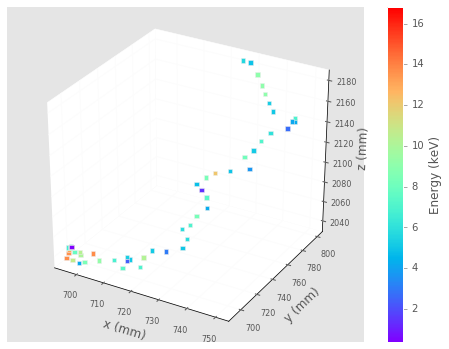

In [82]:
plot_track(geo,mchits,vox_size=10, zoom=True)

 min_x =-1980.0 max_x =1980.0
 min_y =-1980.0 max_y =1980.0
 min_z =0.0 max_z =5320.0
min_e =0 max_e =16.8098697283


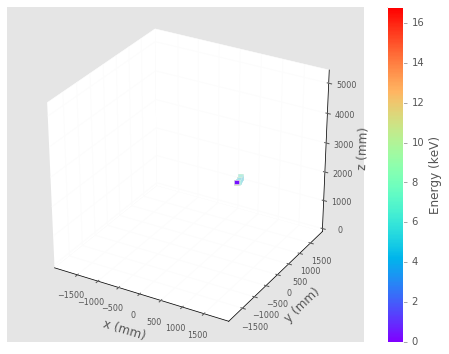

In [83]:
plot_track(geo,mchits,vox_size=10, zoom=False)

In [91]:
pd.__version__

u'0.18.1'

In [92]:
tb.__version__

'3.2.3.1'